## Classificação de melanomas

In [1]:
import pandas as pd
import numpy as np

### Análise dos dados

In [2]:
dataset = pd.read_csv("ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv", sep =",")
dataset.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset.shape

(10015, 8)

In [4]:
### Separação das instâncias em melanoma(MEL) e não melanoma(NO_MEL)

dataset['NO_MEL'] = np.where(dataset['MEL'] == 0.0, 1.0, 0.0)
image_labels = dataset[['image','MEL','NO_MEL']]
image_labels.head()

,image,MEL,NO_MEL
0,ISIC_0024306,0.0,1.0
1,ISIC_0024307,0.0,1.0
2,ISIC_0024308,0.0,1.0
3,ISIC_0024309,0.0,1.0
4,ISIC_0024310,1.0,0.0


In [5]:
image_labels.sum(axis = 0, skipna = True)

image     ISIC_0024306ISIC_0024307ISIC_0024308ISIC_00243...
MEL                                                  1113.0
NO_MEL                                               8902.0
dtype: object

### Funções pra data augmentation

In [6]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

2021-10-18 11:35:24.769940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-18 11:35:24.769956: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Horizontal shift

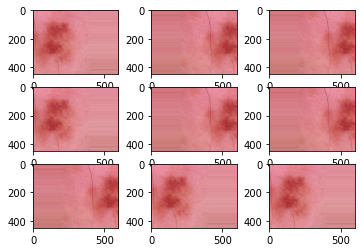

In [7]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

#### Vertical shift

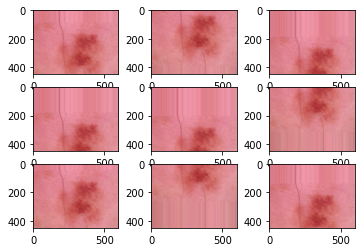

In [8]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

#### Horizontal flip

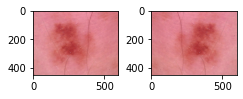

In [9]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

#### Random rotation

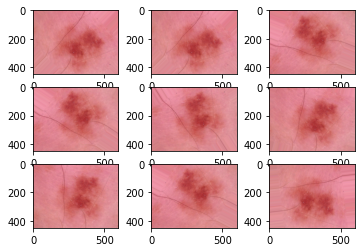

In [10]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

#### Random brightness - Bright

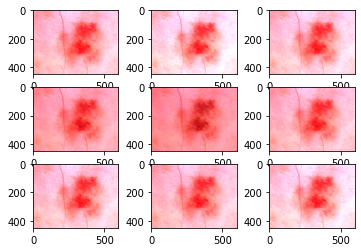

In [11]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[1.2,2.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

#### Random brightness - Dark

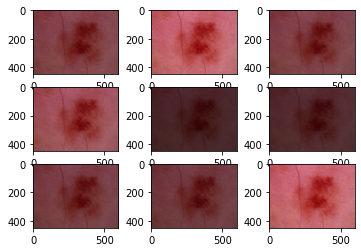

In [12]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

#### Random zoom

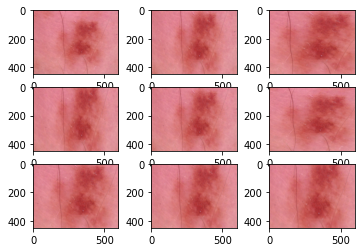

In [13]:
# load the image
img = load_img('ISIC2018_Task3_Training_Input/ISIC_0024307.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

### Pré processamento de imagem

In [14]:
from skimage.transform import resize
from skimage.io import imread
import glob
import cv2 as cv

#### PCA

In [15]:
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

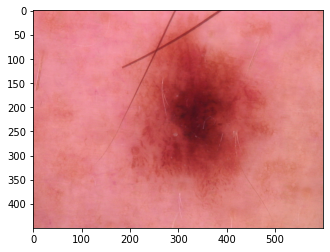

In [16]:
img = cv2.cvtColor(cv2.imread('ISIC2018_Task3_Training_Input/ISIC_0024306.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

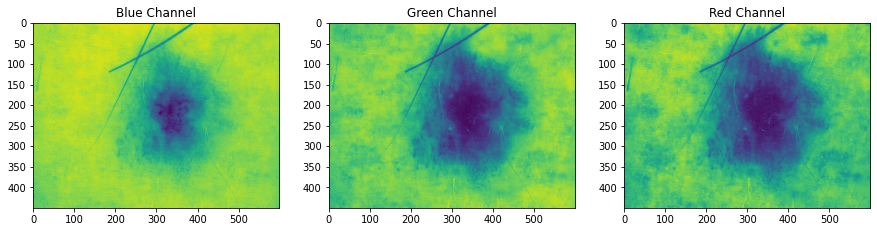

In [17]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [18]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [19]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [20]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9860929005411778
Green Channel: 0.9883354505275617
Red Channel  : 0.9847070974651183


In [21]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

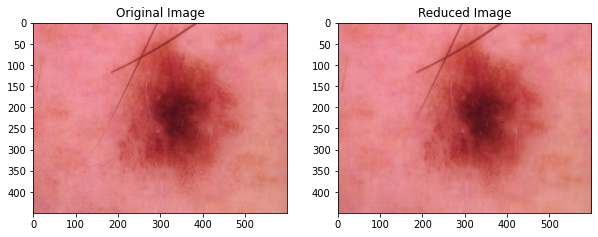

In [22]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

#### Teste remoção de pelos

In [23]:
file = glob.glob("ISIC2018_Task3_Training_Input/ISIC_0024306.jpg")[0]
img_color = imread(file, as_gray=False)

img = cv.imread('ISIC2018_Task3_Training_Input/ISIC_0024306.jpg',0)
edges = cv.Canny(img,100,200)

teste = []
for i in range(len(edges[0])):
    if edges[0][i]!=0:
        teste.append(i)

for i in range(2,7):
    print(i)
    primeiro = teste[i]
    img_color[0][primeiro][0] = 0
    img_color[0][primeiro][1] = 0
    img_color[0][primeiro][2] = 255
print(img_color[0])

2
3
4
5
6
[[221 131 131]
 [222 128 126]
 [223 129 127]
 ...
 [229 134 138]
 [226 136 138]
 [230 135 139]]


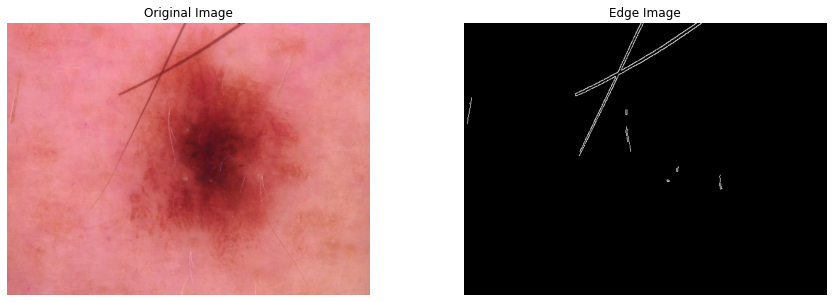

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(img_color,cmap = 'gray')
ax[0].set_title('Original Image') 
ax[0].axis('off')
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].axis('off')
plt.show()

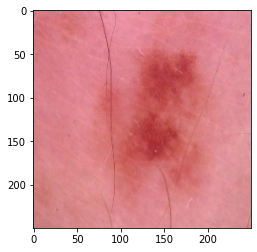

In [25]:
image = cv2.imread("ISIC2018_Task3_Training_Input/ISIC_0024307.jpg")
file = glob.glob("ISIC2018_Task3_Training_Input/ISIC_0024307.jpg")[0]
img = imread(file, as_gray=False)
img_resized = cv2.resize(img, (250,250))
        
plt.imshow(img_resized)
plt.show()